# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


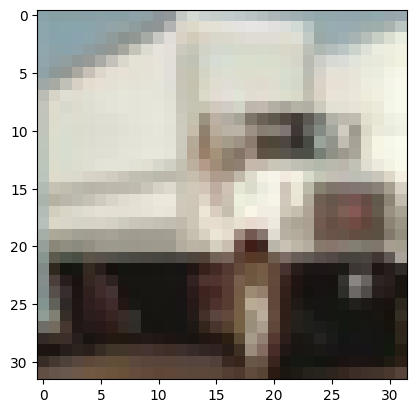

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [8]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 34s 21ms/step - loss: 1.7022 - accuracy: 0.3791 - val_loss: 1.3888 - val_accuracy: 0.5057
Epoch 2/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4462 - accuracy: 0.4847 - val_loss: 1.3171 - val_accuracy: 0.5244
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3678 - accuracy: 0.5144 - val_loss: 1.3094 - val_accuracy: 0.5404
Epoch 4/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3227 - accuracy: 0.5340 - val_loss: 1.2316 - val_accuracy: 0.5705
Epoch 5/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2988 - accuracy: 0.5441 - val_loss: 1.2245 - val_accuracy: 0.5693
Epoch 6/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2826 - accuracy: 0.5516 - val_loss: 1.2162 - val_accuracy: 0.5864
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2769 - accuracy: 0.5603 - val_loss: 1.1666 -

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [16]:
supple_model = Sequential()

## 5x5 convolution with 1x1 stride and 32 filters
supple_model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same', input_shape=x_train.shape[1:]))
supple_model.add(Activation('relu'))

## Another 5x5 convolution with 1x1 stride and 32 filters
supple_model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same'))
supple_model.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
supple_model.add(MaxPooling2D(pool_size=(2, 2)))
supple_model.add(Dropout(0.25))

## Another 5x5 convolution with 1x1 stride and 32 filters
supple_model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same'))
supple_model.add(Activation('relu'))

## Another 5x5 convolution with 1x1 stride and 32 filters
supple_model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same'))
supple_model.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
supple_model.add(MaxPooling2D(pool_size=(2, 2)))
supple_model.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
supple_model.add(Flatten())
supple_model.add(Dense(512))
supple_model.add(Activation('relu'))
supple_model.add(Dropout(0.5))
supple_model.add(Dense(num_classes))
supple_model.add(Activation('softmax'))

supple_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 activation_22 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 activation_23 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                      

In [17]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


supple_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

supple_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 486s 310ms/step - loss: 1.6374 - accuracy: 0.4056 - val_loss: 1.2331 - val_accuracy: 0.5586
Epoch 2/5
1563/1563 [==============================] - 460s 294ms/step - loss: 1.2238 - accuracy: 0.5703 - val_loss: 1.5916 - val_accuracy: 0.4825
Epoch 3/5
1563/1563 [==============================] - 457s 293ms/step - loss: 1.0949 - accuracy: 0.6211 - val_loss: 1.0473 - val_accuracy: 0.6358
Epoch 4/5
1563/1563 [==============================] - 476s 305ms/step - loss: 1.0363 - accuracy: 0.6426 - val_loss: 1.2658 - val_accuracy: 0.5744
Epoch 5/5
1563/1563 [==============================] - 476s 304ms/step - loss: 1.0197 - accuracy: 0.6532 - val_loss: 1.2151 - val_accuracy: 0.6226


In [24]:
supple_model_2 = Sequential()

## 5x5 convolution with 1x1 stride and 32 filters
supple_model_2.add(Conv2D(64, (4, 4), strides=(1, 1), padding='same', input_shape=x_train.shape[1:]))
supple_model_2.add(Activation('relu'))

## 1x1 max pooling reduces to 3 x 3 x 32
supple_model_2.add(MaxPooling2D(pool_size=(2, 2)))
supple_model_2.add(Dropout(0.25))

## Another 5x5 convolution with 1x1 stride and 32 filters
supple_model_2.add(Conv2D(32, (4, 4), strides=(1, 1), padding='same'))
supple_model_2.add(Activation('relu'))

## Another 5x5 convolution with 1x1 stride and 64 filters
supple_model_2.add(Conv2D(64, (4, 4), strides=(1, 1), padding='same'))
supple_model_2.add(Activation('relu'))

## 1x1 max pooling reduces to 3 x 3 x 32
supple_model_2.add(MaxPooling2D(pool_size=(2, 2)))
supple_model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
supple_model_2.add(Flatten())
supple_model_2.add(Dense(512))
supple_model_2.add(Activation('relu'))
supple_model_2.add(Dropout(0.5))
supple_model_2.add(Dense(num_classes))
supple_model_2.add(Activation('softmax'))

supple_model_2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 activation_28 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_73 (Conv2D)          (None, 16, 16, 32)        32800     
                                                                 
 activation_29 (Activation)  (None, 16, 16, 32)        0         
                                                     

In [27]:
batch_size = 64

opt = keras.optimizers.RMSprop(lr=0.0005)


supple_model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

supple_model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 288s 367ms/step - loss: 1.6576 - accuracy: 0.4002 - val_loss: 1.3675 - val_accuracy: 0.5135
Epoch 2/5
782/782 [==============================] - 290s 371ms/step - loss: 1.2490 - accuracy: 0.5592 - val_loss: 1.1834 - val_accuracy: 0.5824
Epoch 3/5
782/782 [==============================] - 291s 372ms/step - loss: 1.0769 - accuracy: 0.6221 - val_loss: 1.2516 - val_accuracy: 0.5713
Epoch 4/5
782/782 [==============================] - 276s 353ms/step - loss: 0.9714 - accuracy: 0.6635 - val_loss: 1.0203 - val_accuracy: 0.6504
Epoch 5/5
782/782 [==============================] - 277s 355ms/step - loss: 0.9099 - accuracy: 0.6858 - val_loss: 1.0631 - val_accuracy: 0.6315


#### Conclusion


This activity helped me comprehend a deeper understanding about convolutional neural networks (CNNs), I have learned the concept and techniques to apply it in this activity to help me finish the given tasks. I realized that the regularization techniques, optimization, and the architecture of the models can impact the performance of the model.

Colab Link: https://colab.research.google.com/drive/1w_jHAtLp86oPp-cMvEGF3Tt7q0y6RI9k?usp=sharing